In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import statistics # for variance
from scipy import stats # calculate trimmed mean

pd.set_option('display.max_rows', 426)

na_vals = ['-1', 1]
indian_food = pd.read_csv("indian_food.csv", na_values=na_vals)
indian_food['ingredients'] = indian_food['ingredients'].apply(lambda x: x.lower())

In [2]:
indian_food.head(2)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East
1,Boondi,"gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West


In [3]:
indian_food['num_ingr'] = indian_food['ingredients'].apply(lambda x: len(x.split(',')))

In [4]:
indian_food.head(2)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,num_ingr
0,Balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East,4
1,Boondi,"gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West,3


In [5]:
def change_width(ax, new_value) :
    """
    Change the width of a bar in a barplot
    """
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

#change_width(ax, .35)

### Ingredients
* Most used ingredient
* Number of ingredients

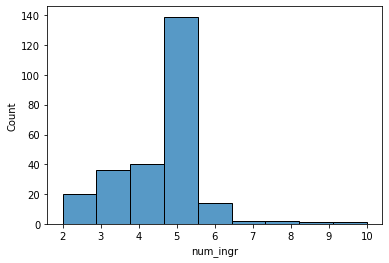

In [6]:
plt.figure()
sns.histplot(indian_food, x="num_ingr", bins =9)
plt.show()

### Diet

In [7]:
indian_food['diet'].value_counts()

vegetarian        226
non vegetarian     29
Name: diet, dtype: int64

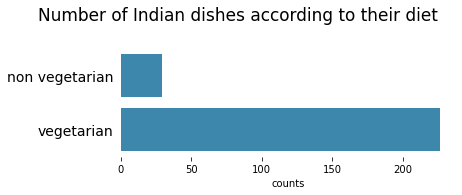

In [8]:
import matplotlib

plt.figure(figsize=(6, 2))#figsize=(9,5)
ax=sns.countplot(y=indian_food['diet'], data=indian_food, 
                 order = indian_food['diet'].value_counts().index[::-1], 
                 color='#2b8cbe')

#sns.despine(bottom = True, left = True) #removes all the frames
sns.despine(bottom = True, left = True)
#ax.tick_params(bottom=False)  # remove the ticks o x
ax.tick_params(left=False)
ax.spines['left'].set_color('grey') # change the color of the axis
#ax.spines['bottom'].set_color('grey') # change the color of the axis
#ax.tick_params(axis='x', colors='grey')  # change the color of courses
ax.tick_params(axis='y', labelsize=14)#, colors='grey', labelsize=14)  # change the color of the numbers

#plt.gca().get_xticklabels()[3].set_color("grey")
#for patch in ax.patches :
    # we change the bar width
#    patch.set_length(2)



plt.title("Number of Indian dishes according to their diet", fontsize=17, y=1.2, x=0.35) #, loc='left'
#plt.xlabel("")
plt.xlabel("counts") # , loc='right'
plt.ylabel("")
#ax.set_xticklabels(['0','50', '100','150','200 counts'])

#matplotlib.rcParams['axes.edgecolor'] = 'grey'
plt.show()

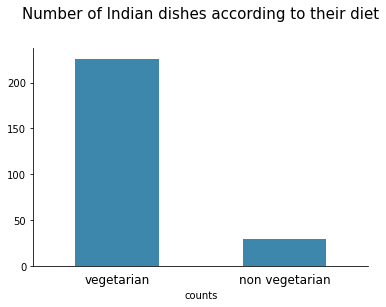

In [9]:
import matplotlib

#sns.set_theme(style="whitegrid") # theme with grid
ax=sns.countplot(x=indian_food["diet"], data=indian_food, 
                 order = indian_food['diet'].value_counts().index, 
                 color='#2b8cbe')

#sns.despine(bottom = True, left = True) #removes all the frames
sns.despine(bottom = False, left = False) #removes frames
ax.tick_params(bottom=False)  # remove the ticks o x
#ax.spines['left'].set_color('grey') # change the color of the axis
#ax.spines['bottom'].set_color('grey') # change the color of the axis
#ax.tick_params(axis='x', colors='grey', labelsize=12)  # change the color of courses
ax.tick_params(axis='x', labelsize=12)
#ax.tick_params(axis='y', colors='grey')  # change the color of the numbers

plt.title("Number of Indian dishes according to their diet", fontsize=15, y=1.11, x=0.5) #, loc='left'
plt.xlabel("")
plt.xlabel("counts")
plt.ylabel("")

#plt.grid(axis = 'y') # add grid
change_width(ax, .5) #.55

#matplotlib.rcParams['axes.edgecolor'] = 'grey'
plt.show()

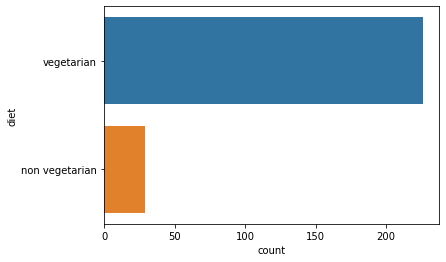

In [10]:
plt.figure()
sns.countplot(y='diet', data=indian_food, 
              order = indian_food['diet'].value_counts().index)
plt.show()

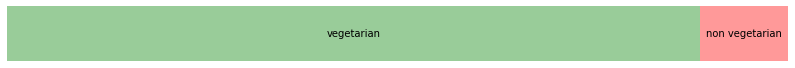

In [11]:
# libraries
import matplotlib.pyplot as plt
import squarify    # pip install squarify (algorithm for treemap)
import pandas as pd

# Create a data frame with fake data
df = pd.DataFrame({'nb_people':[226, 29], 'group':["vegetarian", "non vegetarian"] })

# plot it
plt.figure(figsize=(14,1))

squarify.plot(sizes=df['nb_people'], label=df['group'], alpha=.4, color=["green", "red"])
plt.axis('off')
plt.show()

In [12]:
def count_cat(size=None, ):
    plt.figure(size)
    sns.countplot()

### Flavor

In [13]:
indian_food['flavor_profile'].value_counts()

spicy     133
sweet      88
bitter      4
sour        1
Name: flavor_profile, dtype: int64

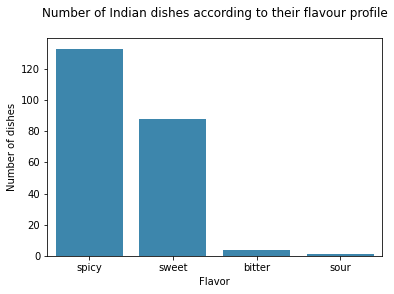

In [14]:
plt.figure()#figsize=(9,5)

sns.countplot(x='flavor_profile', data=indian_food, 
              order = indian_food['flavor_profile'].value_counts().index, color='#2b8cbe')

plt.title("Number of Indian dishes according to their flavour profile", fontsize=12, y=1.07) #, loc='left'
plt.xlabel("Flavor")
plt.ylabel("Number of dishes")

plt.show()

In [15]:
counts= indian_food['flavor_profile'].value_counts(normalize=True)
per_flav = counts.mul(100).rename('percent').reset_index()
per_flav

,index,percent
0,spicy,58.849558
1,sweet,38.938053
2,bitter,1.769912
3,sour,0.442478


(0.0, 60.0)

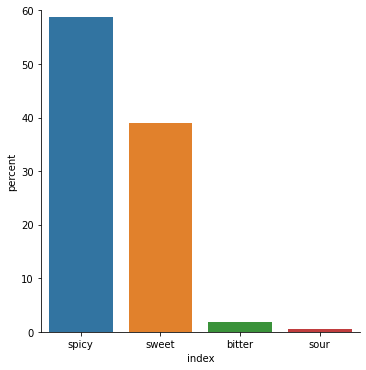

In [16]:
g = sns.catplot(x='index', y='percent', kind='bar', 
                data=per_flav)
g.ax.set_ylim(0,60)

In [17]:
def plotting_percentages(df, col):
    x= col
    
    # Temporary dataframe with percentage values
    temp_df = df[x].value_counts(normalize=True)
    temp_df = temp_df.mul(100).rename('percent').reset_index()

    # Sort the column values for plotting    
    order_list = list(df[col].unique())
    order_list.sort()

    # Plot the figure
    sns.set(font_scale=1.5)
    g = sns.catplot(x=x, y='percent',kind='bar', data=temp_df, 
                    height=8, aspect=2, order=order_list, legend_out=False)
    g.ax.set_ylim(0,100)

    # Loop through each bar in the graph and add the percentage value    
    for p in g.ax.patches:
        txt = str(p.get_height().round(1)) + '%'
        txt_x = p.get_x() 
        txt_y = p.get_height()
        g.ax.text(txt_x,txt_y,txt)
        
    # Set labels and title
    plt.title(f'{col.title()} By Percent {target.title()}', 
              fontdict={'fontsize': 30})
    plt.xlabel(f'{col.title()}', fontdict={'fontsize': 20})
    plt.ylabel(f'{target.title()} Percentage', fontdict={'fontsize': 20})
    plt.xticks(rotation=75)
    return g

In [18]:
#plotting_percentages(indian_food, 'flavor_profile')

In [19]:
type(indian_food['flavor_profile'].iloc[104])
flavor_prof=[]
for prof in indian_food['flavor_profile']:
    if type(prof) != float:
       flavor_prof.append(prof)
    
dfflavor_profile = pd.DataFrame(flavor_prof, columns =['flavor_profile'])
#flavor_profile

In [20]:
def without_nan(column, name_column):
    """
    Crea una lista sin nan y la
    transforma a data frame
    
    column: the column of the df
    name_column: str nombre que recibe la columna
    """
    new_list = []
    for prof in column:
        if type(prof) != float:
            new_list.append(prof)
    
    return pd.DataFrame(new_list, columns =[name_column])

df_flavor = without_nan(indian_food['flavor_profile'], 'flavor_profile')
#df_flavor

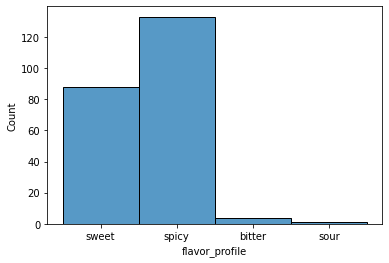

In [21]:
def plot_cat_var(column, name_column):
    plt.figure()
    sns.histplot(without_nan(column, name_column), x=name_column)
    return plt.show()

plot_cat_var(indian_food['flavor_profile'], 'flavor_profile')

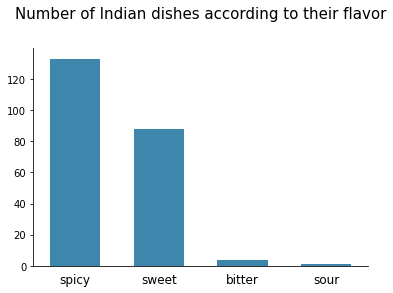

In [22]:
import matplotlib

#sns.set_theme(style="whitegrid") # theme with grid
ax=sns.countplot(x=indian_food["flavor_profile"], data=indian_food, 
                 order = indian_food['flavor_profile'].value_counts().index, 
                 color='#2b8cbe')

#sns.despine(bottom = True, left = True) #removes all the frames
sns.despine(bottom = False, left = False)
ax.tick_params(bottom=False)  # remove the ticks o x
#ax.spines['left'].set_color('grey') # change the color of the axis
#ax.spines['bottom'].set_color('grey') # change the color of the axis
#ax.tick_params(axis='x', colors='grey', labelsize=12)  # change the color of courses
ax.tick_params(axis='x', labelsize=12)
#ax.tick_params(axis='y', colors='grey')  # change the color of the numbers

plt.title("Number of Indian dishes according to their flavor", fontsize=15, y=1.11, x=0.5) #, loc='left'
plt.xlabel("")
plt.ylabel("")

#plt.grid(axis = 'y') # add grid
change_width(ax, .6) #.55

#matplotlib.rcParams['axes.edgecolor'] = 'grey'
plt.show()

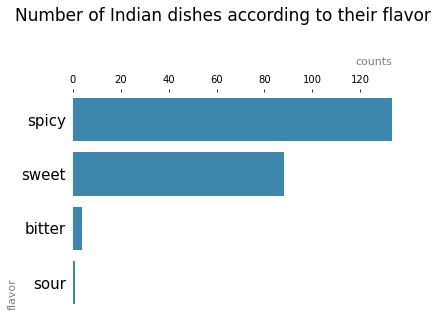

In [76]:
import matplotlib

ax=sns.countplot(y=indian_food["flavor_profile"], data=indian_food, 
                 order = indian_food['flavor_profile'].value_counts().index, 
                 color='#2b8cbe')

#sns.despine(bottom = True, left = True) #removes all the frames
sns.despine(bottom = True, left = True) #removes frames
ax.xaxis.tick_top() # move x-axis to the top of the plot
#ax.tick_params(bottom=False)  # remove the ticks o x
ax.tick_params(left=False)
ax.spines['left'].set_color('grey') # change the color of the axis
#ax.spines['bottom'].set_color('grey') # change the color of the axis
#ax.tick_params(axis='x', colors='grey')  # change the color of courses
ax.tick_params(axis='y', labelsize=15)#, colors='grey', labelsize=14)  # change the color of the numbers

plt.title("Number of Indian dishes according to their flavor", fontsize=17, y=1.3, x=0.45) #, loc='left'
#plt.xlabel("")
plt.xlabel("counts")#, color='grey')
plt.ylabel("")
#ax.set_xticklabels(['0','20', '40','60', '80', '100', '120'])
ax.text(x=118, y=-1, s='counts', fontsize=11, color='grey') # agrega texto x=-0.1
plt.xlabel("")
plt.ylabel("flavor", loc='bottom', color='grey', fontsize=11)
#plt.grid(axis = 'x', color='white') # agrega grid y lo cambia de color
#ax.xaxis.set_label_position('top') # move the label to the top
#ax.xaxis.tick_top() # move x-axis to the top of the plot

#matplotlib.rcParams['axes.edgecolor'] = 'grey'
plt.show()

### Course

In [24]:
indian_food['course'].value_counts()

main course    129
dessert         85
snack           39
starter          2
Name: course, dtype: int64

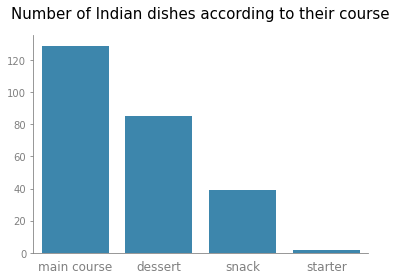

In [25]:
import matplotlib

ax=sns.countplot(x=indian_food["course"], data=indian_food, 
                 order = indian_food['course'].value_counts().index, 
                 color='#2b8cbe')

#sns.despine(bottom = True, left = True) #removes all the frames
sns.despine(bottom = False, left = False)
ax.tick_params(bottom=False)  # remove the ticks o x
ax.spines['left'].set_color('grey') # change the color of the axis
ax.spines['bottom'].set_color('grey') # change the color of the axis
ax.tick_params(axis='x', colors='grey', labelsize=12)  # change the color of courses
ax.tick_params(axis='y', colors='grey')  # change the color of the numbers

#plt.gca().get_xticklabels()[3].set_color("grey")

plt.title("Number of Indian dishes according to their course", fontsize=15, y=1.05, x=0.5) #, loc='left'
plt.xlabel("")
plt.ylabel("")

#matplotlib.rcParams['axes.edgecolor'] = 'grey'
plt.show()

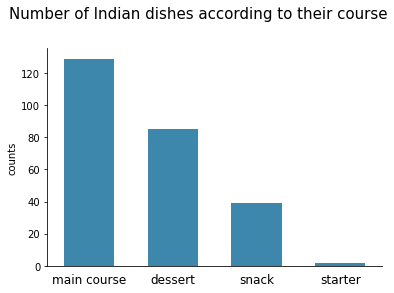

In [26]:
import matplotlib

#sns.set_theme(style="whitegrid") # theme with grid
ax=sns.countplot(x=indian_food["course"], data=indian_food, 
                 order = indian_food['course'].value_counts().index, 
                 color='#2b8cbe')

#sns.despine(bottom = True, left = True) #removes all the frames
sns.despine(bottom = False, left = False)
ax.tick_params(bottom=False)  # remove the ticks o x
#ax.spines['left'].set_color('grey') # change the color of the axis
#ax.spines['bottom'].set_color('grey') # change the color of the axis
#ax.tick_params(axis='x', colors='grey', labelsize=12)  # change the color of courses
ax.tick_params(axis='x', labelsize=12)
#ax.tick_params(axis='y', colors='grey')  # change the color of the numbers

plt.title("Number of Indian dishes according to their course", fontsize=15, y=1.11, x=0.45) #, loc='left'
plt.xlabel("")
#plt.ylabel("")
plt.ylabel("counts")


#plt.grid(axis = 'y') # add grid
change_width(ax, .6) #.55

#matplotlib.rcParams['axes.edgecolor'] = 'grey'
plt.show()

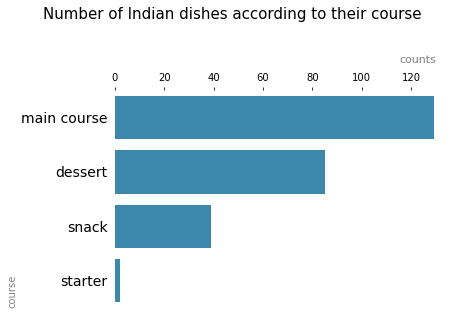

In [119]:
import matplotlib

ax=sns.countplot(y=indian_food["course"], data=indian_food, 
                 order = indian_food['course'].value_counts().index, 
                 color='#2b8cbe')

#sns.despine(bottom = True, left = True) #removes all the frames
sns.despine(bottom = True, left = True, top=True)
#ax.tick_params(bottom=False)  # remove the ticks o x
ax.tick_params(left=False)
ax.spines['left'].set_color('grey') # change the color of the axis
#ax.spines['bottom'].set_color('grey') # change the color of the axis
#ax.tick_params(axis='x', colors='grey')  # change the color of courses
ax.tick_params(axis='y', labelsize=14)#, colors='grey', labelsize=14)  # change the color of the numbers

#plt.gca().get_xticklabels()[3].set_color("grey")
#for patch in ax.patches :
    # we change the bar width
#    patch.set_length(2)

plt.title("Number of Indian dishes according to their course", fontsize=15, y=1.3, x=0.35) #, loc='left'
plt.xlabel("")#counts", loc='right', y=110, color='grey')
ax.text(x=115, y=-1, s='counts', fontsize=11, color='grey') # agrega texto x=-0.1
plt.ylabel("course", loc='bottom', color='grey')
#plt.grid(axis = 'x', color='white') # agrega grid y lo cambia de color
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top() # move x-axis to the top of the plot


#matplotlib.rcParams['axes.edgecolor'] = 'grey'
plt.show()

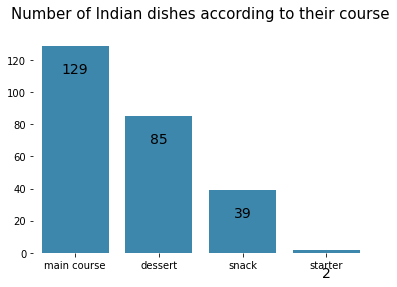

In [28]:
ax=sns.countplot(x=indian_food["course"], data=indian_food, 
                 order = indian_food['course'].value_counts().index, 
                 color='#2b8cbe');
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='black', size=14)

plt.title("Number of Indian dishes according to their course", fontsize=15, y=1.05, x=0.5) #, loc='left'
plt.xlabel("")
plt.ylabel("")
sns.despine(bottom = True, left = True)

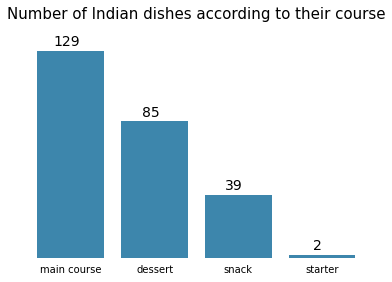

In [29]:
ax=sns.countplot(x=indian_food["course"], data=indian_food, 
                 order = indian_food['course'].value_counts().index, 
                 color='#2b8cbe');
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height() + 3
    ax.annotate(f'\n{p.get_height()}', (x, y), ha='center', size=14)
    
ax.tick_params(left=False)  # remove the ticks of y
ax.tick_params(bottom=False)  # remove the ticks o x
plt.tick_params(labelleft=False, left=False) #remove the y-axis label

plt.title("Number of Indian dishes according to their course", fontsize=15, y=1.07, x=0.5) #, loc='left'
plt.xlabel("")
plt.ylabel("")

sns.despine(bottom = True, left = True) #removes frame

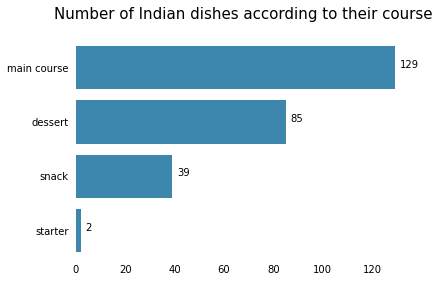

In [30]:
ax=sns.countplot(y=indian_food["course"], data=indian_food, 
                 order = indian_food['course'].value_counts().index, 
                 color='#2b8cbe');

for p in ax.patches:
    _x = p.get_x() + p.get_width() + 2 # el ultimo numero mueve a la izq
    _y = p.get_y() + p.get_height()  - (p.get_height()*0.5)
    value = '{:}'.format(p.get_width())
    ax.text(_x, _y, value, ha="left")
    
ax.tick_params(left=False)  # remove the ticks of y
ax.tick_params(bottom=False)  # remove the ticks o x
#plt.tick_params(labelleft=False, left=False) #remove the y-axis label

plt.title("Number of Indian dishes according to their course", fontsize=15, y=1.07, x=0.5) #, loc='left'
plt.xlabel("")
plt.ylabel("")

sns.despine(bottom = True, left = True)

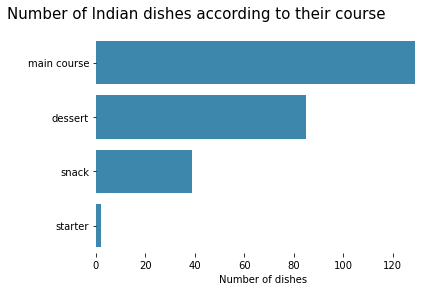

In [31]:
plt.figure()
sns.countplot(y="course", data=indian_food, 
              order = indian_food['course'].value_counts().index, 
              color='#2b8cbe')
plt.title("Number of Indian dishes according to their course", fontsize=15, y=1.05, x=0.3) #, loc='left'
plt.xlabel("Number of dishes")
plt.ylabel("")
ax.tick_params(left=False)  # remove the ticks of y
sns.despine(bottom = True, left = True)

plt.show()

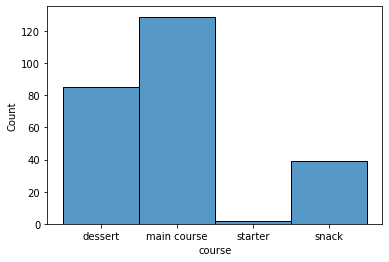

In [32]:
plt.figure()
sns.histplot(indian_food, x="course")
plt.show()

### State

In [33]:
indian_food['state'].value_counts()

Gujarat            35
Punjab             32
Maharashtra        30
West Bengal        24
Assam              21
Tamil Nadu         20
Andhra Pradesh     10
Uttar Pradesh       9
Kerala              8
Odisha              7
Rajasthan           6
Karnataka           6
Telangana           5
Goa                 3
Bihar               3
Jammu & Kashmir     2
Manipur             2
Madhya Pradesh      2
Uttarakhand         1
Nagaland            1
Chhattisgarh        1
NCT of Delhi        1
Haryana             1
Tripura             1
Name: state, dtype: int64

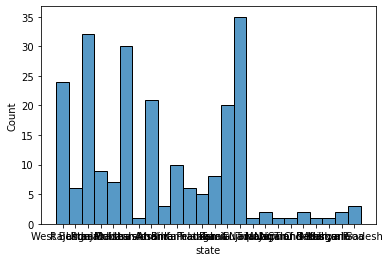

In [34]:
plot_cat_var(indian_food['state'], 'state')

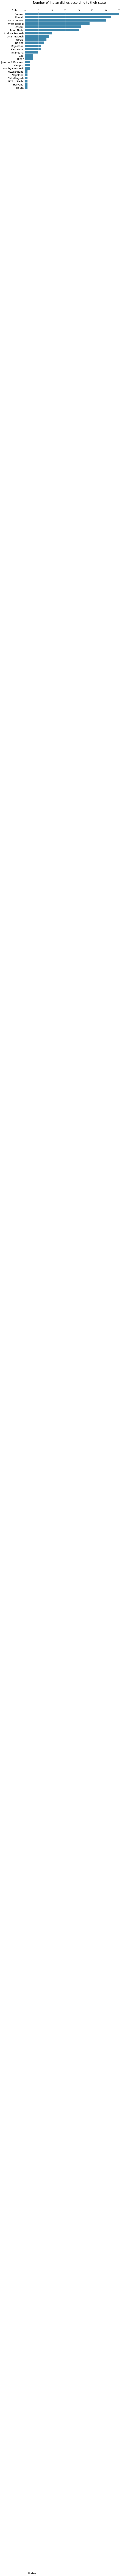

In [35]:
import matplotlib

plt.figure(figsize=(10,8))
ax=sns.countplot(y=indian_food['state'], 
                 data=indian_food, 
                 order = indian_food['state'].value_counts().index, 
                 color='#2b8cbe')

#sns.despine(bottom = True, left = True) #removes all the frames
sns.despine(bottom = True, left = True)
#ax.tick_params(bottom=False)  # remove the ticks o x, cuando esta abajo
#ax.tick_params(color='white') # change color of the x-axis ticks
ax.tick_params(left=False)
ax.spines['left'].set_color('grey') # change the color of the axis
#ax.spines['bottom'].set_color('grey') # change the color of the axis
#ax.tick_params(axis='x', colors='grey')  # change the color of courses
ax.tick_params(axis='y', labelsize=14)#, colors='grey', labelsize=14)  # change the color of the numbers

plt.grid(axis = 'x', color='white') # agrega grid y lo cambia de color
ax.xaxis.tick_top() # move x-axis to the top of the plot
ax.text(x=1, y=800, s='States', fontsize=16)

plt.title("Number of Indian dishes according to their state", fontsize=17, y=1.1, x=0.45) #, loc='left'
plt.xlabel("")
plt.ylabel("") # the ylabel is not visible

ax.text(x=-5, y=-1, s='State', fontsize=13) # agrega texto

plt.show()

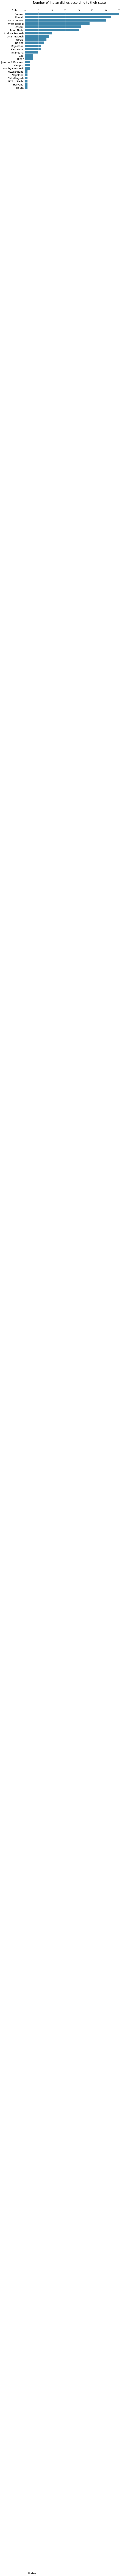

In [47]:
import matplotlib
plt.figure(figsize=(10,8))
ax=sns.countplot(y=indian_food['state'], 
                 data=indian_food, 
                 order = indian_food['state'].value_counts().index, 
                 color='#2b8cbe')
sns.despine(bottom = True, left = True) #removes frames
ax.tick_params(left=False)
ax.spines['left'].set_color('grey') # change the color of the axis
ax.tick_params(axis='y', labelsize=14)#, colors='grey', labelsize=14)  # change the color of the numbers
plt.grid(axis = 'x', color='white') # agrega grid y lo cambia de color
ax.xaxis.tick_top() # move x-axis to the top of the plot
ax.text(x=1, y=800, s='States', fontsize=16)
plt.title("Number of Indian dishes according to their state", fontsize=17, y=1.1, x=0.45) #, loc='left'
plt.xlabel("")
plt.ylabel("") # the ylabel is not visible
ax.text(x=-5, y=-1, s='State', fontsize=13) # agrega texto
plt.show()

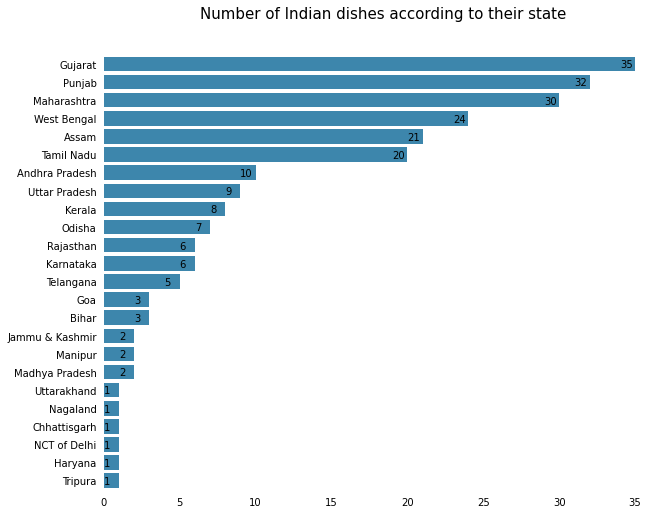

In [37]:
plt.figure(figsize=(10,8))
ax=sns.countplot(y=indian_food["state"], data=indian_food, 
                 order = indian_food['state'].value_counts().index, 
                 color='#2b8cbe');

for p in ax.patches:
    _x = p.get_x() + p.get_width() - 1 # el ultimo numero mueve a la izq
    _y = p.get_y() + p.get_height()  - (p.get_height()*0.5) +0.2
    value = '{:}'.format(p.get_width())
    ax.text(_x, _y, value, ha="left")
    
ax.tick_params(left=False)  # remove the ticks of y
ax.tick_params(bottom=False)  # remove the ticks o x
#plt.tick_params(labelleft=False, left=False) #remove the y-axis label

plt.title("Number of Indian dishes according to their state", fontsize=15, y=1.07, x=0.5) #, loc='left'
plt.xlabel("")
plt.ylabel("")

sns.despine(bottom = True, left = True)

In [38]:
(35+32+30+24+21+20+10+9+8+7+6+6+5+3+3+2+2+2+6)/24

9.625

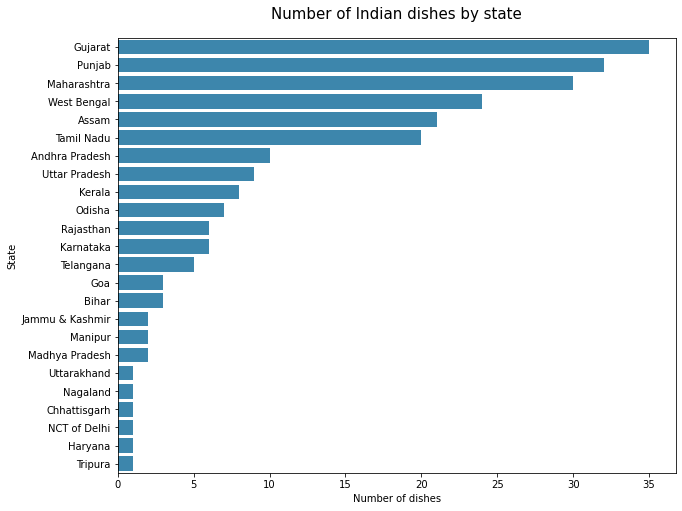

In [39]:
plt.figure(figsize=(10,8))
sns.countplot(y="state", data=indian_food, 
              order = indian_food['state'].value_counts().index, color='#2b8cbe')

plt.title("Number of Indian dishes by state", fontsize=15, y=1.03) #, loc='left'
plt.xlabel("Number of dishes")
plt.ylabel("State")

plt.show()

### Region

In [40]:
indian_food['region'].value_counts()

West          74
South         59
North         49
East          31
North East    25
Central        3
Name: region, dtype: int64

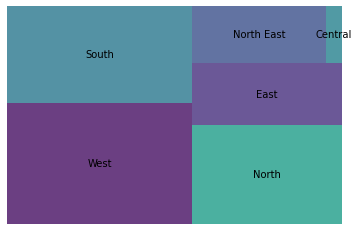

In [41]:
# libraries
import matplotlib.pyplot as plt
import squarify    # pip install squarify (algorithm for treemap)
import pandas as pd

# Create a data frame with fake data
df = pd.DataFrame({'nb_people':[74, 59, 49, 31, 25, 3], 'group':["West", "South", "North", "East", "North East", "Central"] })

# plot it
squarify.plot(sizes=df['nb_people'], label=df['group'], alpha=.8 )
plt.axis('off')
plt.show()

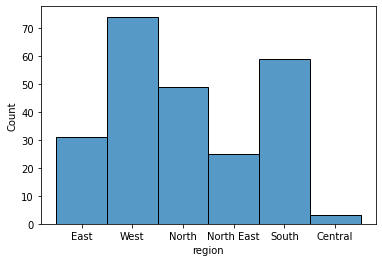

In [42]:
plot_cat_var(indian_food['region'], 'region')

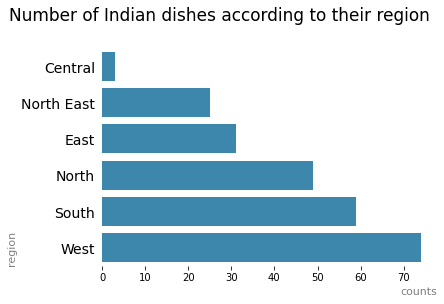

In [101]:
import matplotlib

ax=sns.countplot(y=indian_food['region'], data=indian_food, 
                 order = indian_food['region'].value_counts().index[::-1], 
                 color='#2b8cbe')

#sns.despine(bottom = True, left = True) #removes all the frames
sns.despine(bottom = True, left = True)
#ax.tick_params(bottom=False)  # remove the ticks o x
ax.tick_params(left=False)
ax.spines['left'].set_color('grey') # change the color of the axis
#ax.spines['bottom'].set_color('grey') # change the color of the axis
#ax.tick_params(axis='x', colors='grey')  # change the color of courses
ax.tick_params(axis='y', labelsize=14)#, colors='grey', labelsize=14)  # change the color of the numbers

#plt.gca().get_xticklabels()[3].set_color("grey")
#for patch in ax.patches :
    # we change the bar width
#    patch.set_length(2)

#plt.grid(axis = 'x', color='white') # agrega grid y lo cambia de color

plt.title("Number of Indian dishes according to their region", fontsize=17, y=1.1, x=0.35) #, loc='left'
#plt.xlabel("")
plt.xlabel("counts", loc='right', color='grey', fontsize=11)
plt.ylabel("region", loc='bottom', color='grey', fontsize=11)

#matplotlib.rcParams['axes.edgecolor'] = 'grey'
plt.show()

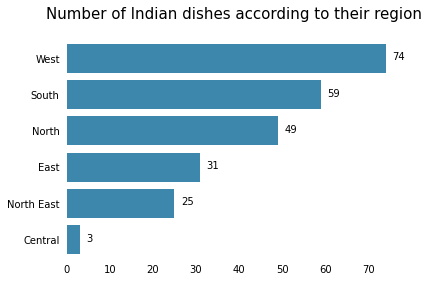

In [44]:

ax=sns.countplot(y=indian_food["region"], data=indian_food, 
                 order = indian_food['region'].value_counts().index, 
                 color='#2b8cbe');

for p in ax.patches:
    _x = p.get_x() + p.get_width() + 1.5 # el ultimo numero mueve a la izq
    _y = p.get_y() + p.get_height()  - (p.get_height()*0.5) +0.05
    value = '{:}'.format(p.get_width())
    ax.text(_x, _y, value, ha="left")
    
ax.tick_params(left=False)  # remove the ticks of y
ax.tick_params(bottom=False)  # remove the ticks o x
#plt.tick_params(labelleft=False, left=False) #remove the y-axis label

plt.title("Number of Indian dishes according to their region", fontsize=15, y=1.07, x=0.5) #, loc='left'
plt.xlabel("")
plt.ylabel("")

sns.despine(bottom = True, left = True)

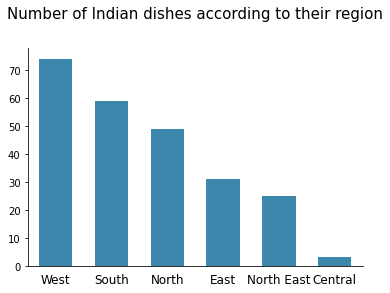

In [45]:
import matplotlib

#sns.set_theme(style="whitegrid") # theme with grid
ax=sns.countplot(x=indian_food["region"], data=indian_food, 
                 order = indian_food['region'].value_counts().index, 
                 color='#2b8cbe')

#sns.despine(bottom = True, left = True) #removes all the frames
sns.despine(bottom = False, left = False)
ax.tick_params(bottom=False)  # remove the ticks o x
#ax.spines['left'].set_color('grey') # change the color of the axis
#ax.spines['bottom'].set_color('grey') # change the color of the axis
#ax.tick_params(axis='x', colors='grey', labelsize=12)  # change the color of courses
ax.tick_params(axis='x', labelsize=12)
#ax.tick_params(axis='y', colors='grey')  # change the color of the numbers

plt.title("Number of Indian dishes according to their region", fontsize=15, y=1.11, x=0.5) #, loc='left'
plt.xlabel("")
plt.ylabel("")

#plt.grid(axis = 'y', color='white') # add grid
change_width(ax, .6) #.55

#matplotlib.rcParams['axes.edgecolor'] = 'grey'
plt.show()

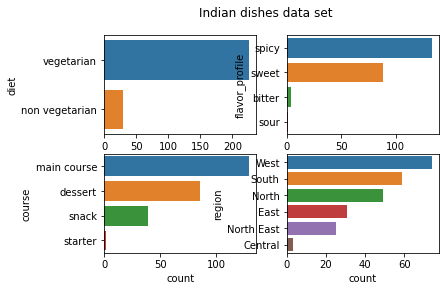

In [46]:
#fig, ax = plt.subplots(2, 2)
#fig.tight_layout()

#plot 2:
plt.subplot(2, 2, 1)
sns.countplot(y='diet', data=indian_food, 
              order = indian_food['diet'].value_counts().index)

#plot 3:
plt.subplot(2, 2, 2)
sns.countplot(y='flavor_profile', data=indian_food, 
              order = indian_food['flavor_profile'].value_counts().index)

#plot 4:
plt.subplot(2, 2, 3)
sns.countplot(y="course", data=indian_food, 
              order = indian_food['course'].value_counts().index)

#plot 5:
plt.subplot(2, 2, 4)
sns.countplot(y="region", data=indian_food, 
              order = indian_food['region'].value_counts().index)

plt.suptitle("Indian dishes data set")
plt.show()

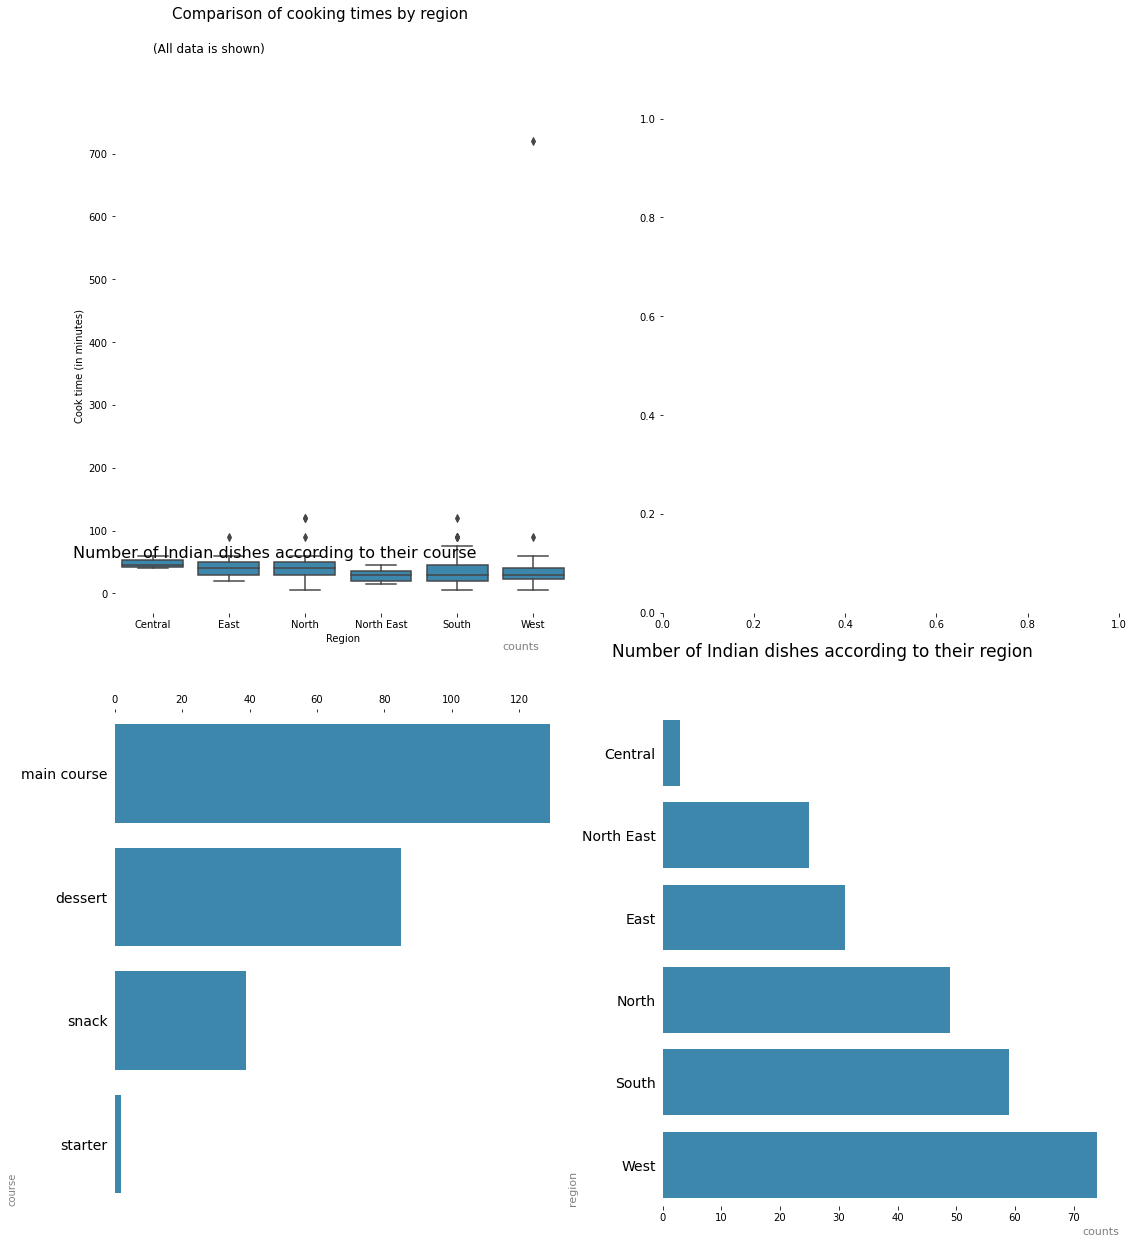

In [113]:
plt.figure(figsize=(18,20))
#plt.subplot(n of rows, n of columns, plot number)


#plot 1
plt.subplot(2, 2, 1)

new_order = indian_food.groupby(by=['region'])['cook_time'].median().iloc[::1].index
ax = sns.boxplot(x='region', y='cook_time', data=indian_food, order=new_order, color='#2b8cbe')

sns.despine(bottom = False, left = False) #removes frames

plt.title('Comparison of cooking times by region', y=1.19, x=0.45, fontsize=15)
#plt.suptitle('(All data is shown)') #do not work?!
ax.text(x=0, y=861, s='(All data is shown)', fontsize=12) # agrega texto
plt.xlabel('Region')
plt.ylabel('Cook time (in minutes)')

#plot 2
plt.subplot(2, 2, 2)


#plot 3
plt.subplot(2, 2, 3)

ax=sns.countplot(y=indian_food["course"], data=indian_food, 
                 order = indian_food['course'].value_counts().index, 
                 color='#2b8cbe')

sns.despine(bottom = True, left = True, top=True)
ax.tick_params(left=False)
ax.spines['left'].set_color('grey') # change the color of the axis
ax.tick_params(axis='y', labelsize=14)#, colors='grey', labelsize=14)  # change the color of the numbers

plt.title("Number of Indian dishes according to their course", fontsize=16, y=1.3, x=0.35) #, loc='left'
plt.xlabel("")#counts", loc='right', y=110, color='grey')
ax.text(x=115, y=-1, s='counts', fontsize=11, color='grey') # agrega texto x=-0.1
plt.ylabel("course", loc='bottom', color='grey')
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top() # move x-axis to the top of the plot


#plot4
plt.subplot(2, 2, 4)

ax=sns.countplot(y=indian_food['region'], data=indian_food, 
                 order = indian_food['region'].value_counts().index[::-1], 
                 color='#2b8cbe')

sns.despine(bottom = True, left = True) #removes all the frames
ax.tick_params(left=False)
ax.spines['left'].set_color('grey') # change the color of the axis
ax.tick_params(axis='y', labelsize=14)#, colors='grey', labelsize=14)  # change the color of the numbers

plt.title("Number of Indian dishes according to their region", fontsize=17, y=1.1, x=0.35) #, loc='left'
plt.xlabel("counts", loc='right', color='grey', fontsize=11)
plt.ylabel("region", loc='bottom', color='grey', fontsize=11)

plt.show()

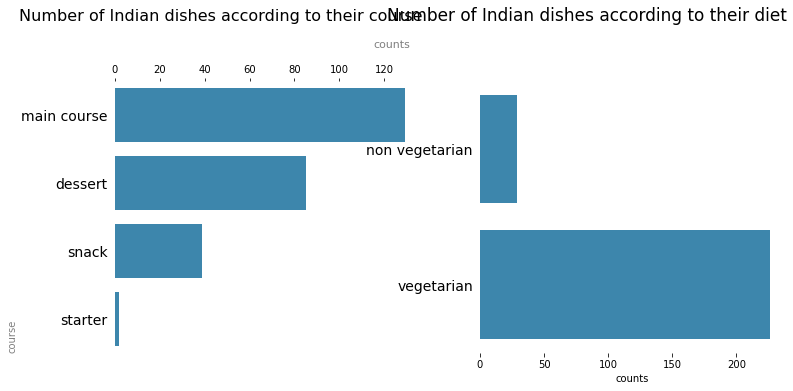

In [118]:
plt.figure(figsize=(12,5))
#plt.subplot(n of rows, n of columns, plot number)


#plot 1
plt.subplot(1, 2, 1)

ax=sns.countplot(y=indian_food["course"], data=indian_food, 
                 order = indian_food['course'].value_counts().index, 
                 color='#2b8cbe')

sns.despine(bottom = True, left = True, top=True)
ax.tick_params(left=False)
ax.spines['left'].set_color('grey') # change the color of the axis
ax.tick_params(axis='y', labelsize=14)#, colors='grey', labelsize=14)  # change the color of the numbers

plt.title("Number of Indian dishes according to their course", fontsize=16, y=1.2, x=0.35) #, loc='left'
plt.xlabel("")#counts", loc='right', y=110, color='grey')
ax.text(x=115, y=-1, s='counts', fontsize=11, color='grey') # agrega texto x=-0.1
plt.ylabel("course", loc='bottom', color='grey')
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top() # move x-axis to the top of the plot

#plot 2
plt.subplot(1, 2, 2)

ax=sns.countplot(y=indian_food['diet'], data=indian_food, 
                 order = indian_food['diet'].value_counts().index[::-1], 
                 color='#2b8cbe')

sns.despine(bottom = True, left = True)
ax.tick_params(left=False)
ax.spines['left'].set_color('grey') # change the color of the axis
ax.tick_params(axis='y', labelsize=14)#, colors='grey', labelsize=14)  # change the color of the numbers

plt.title("Number of Indian dishes according to their diet", fontsize=17, y=1.2, x=0.35) #, loc='left'
plt.xlabel("counts") # , loc='right'
plt.ylabel("")


plt.show()